In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sumanth/Documents/ML_PyNotes/Resource_Notebooks/05-Seaborn/dm_office_sales.csv')
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


Boxplot : Shows the distribution of datapoints in terms of quartile range
            Mid line inside the box represents the median, 50% of the data points to each side of the median
            Left/lower and Right/upper edges of the box represents Q1 and Q3 quartiles respectively, 
                IQR (Inter Quartile Range) = Q3 - Q1 
                50% of data points in IQR
                25% of data points farther the box edges (Q1 & Q3)
            Whiskers extend upto Qx*IQR
            Outliers are datapoints outside of Whiskers           

<Axes: xlabel='salary', ylabel='division'>

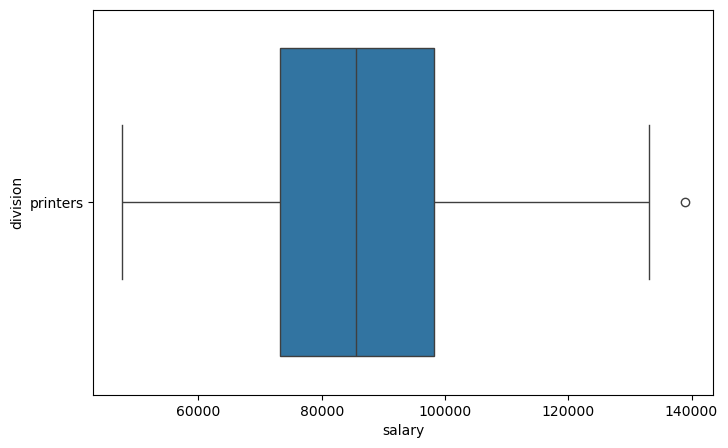

In [3]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df['division']=='printers'],x='salary',y='division',orient='h')

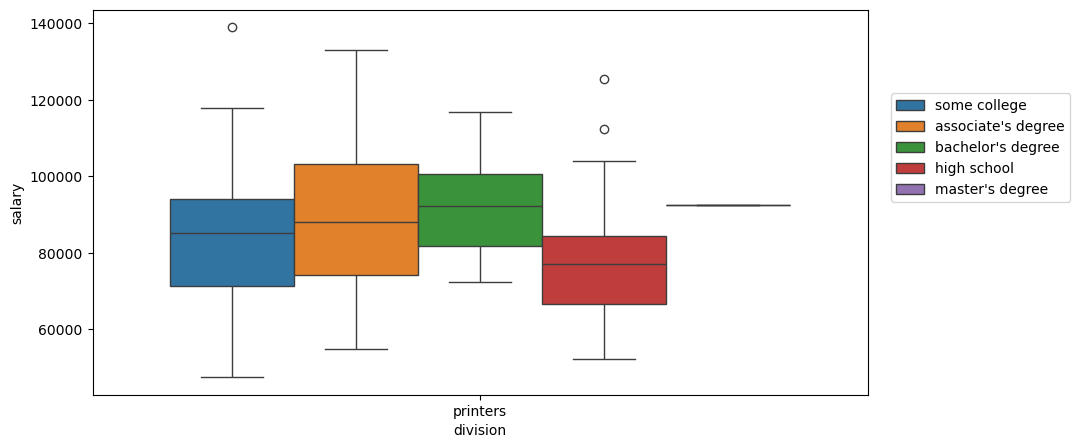

In [4]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['division']=='printers'],x='division',y='salary',hue='level of education')
plt.legend(loc=(1.03,0.5))

In [5]:
sns.set_style(style='darkgrid')

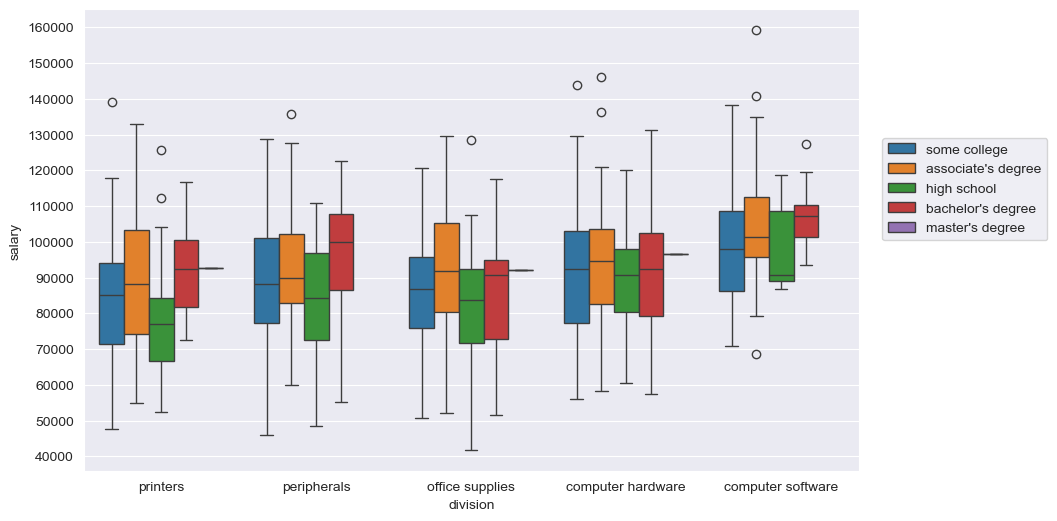

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='division',  y='salary', hue='level of education',orient='v')
plt.legend(loc=(1.03,0.5))
plt.yticks(np.arange(40000,170000,10000))
plt.show()

Violin Plot : Represents the KDE merged with flipped KDE 
                White dot represents the median
                Thick black line represents the IQR
                Thin black line represents Whickers
                to get more readability, we can use inner parameter 
                bw (bandwidth) parameter increases the accuracy of KDE

<Axes: xlabel='salary', ylabel='division'>

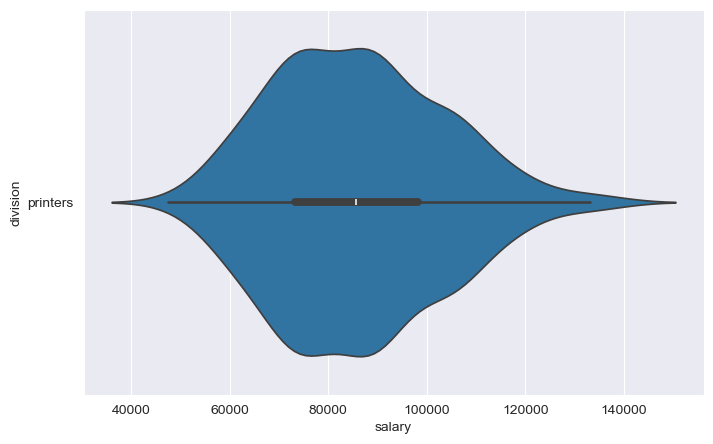

In [7]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df[df['division']=='printers'],x='salary',y='division',orient='h')

/var/folders/l8/_b6fjjrx2bd3sc4gf4vqf0vc0000gp/T/ipykernel_33754/3992554308.py:2: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=df[df['division']=='printers'],x='salary',y='division',orient='h',inner='quartile',bw=0.2)


<Axes: xlabel='salary', ylabel='division'>

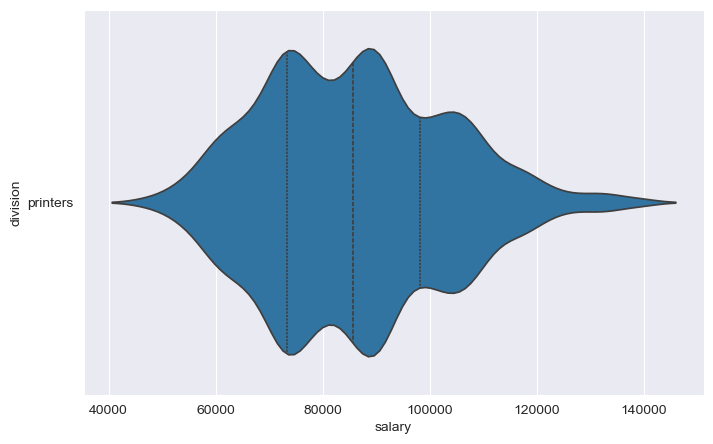

In [8]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df[df['division']=='printers'],x='salary',y='division',orient='h',inner='quartile',bw=0.2)

<Axes: xlabel='division', ylabel='salary'>

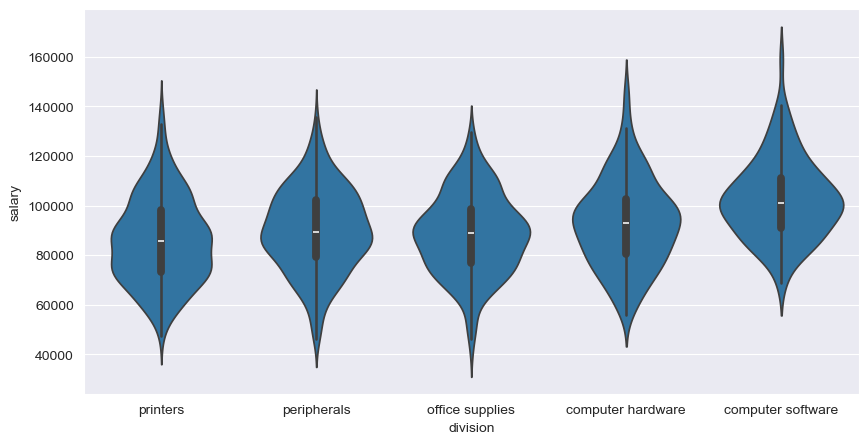

In [9]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df,x='division',y='salary',orient='v')

Swarm Plot : Plots in data points, in a mirror image manner, but actually isnt a mirror image
                We can get to know the density/amount of datapoints each category differ by
                for large dataset, it wont plot all the datapoints

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


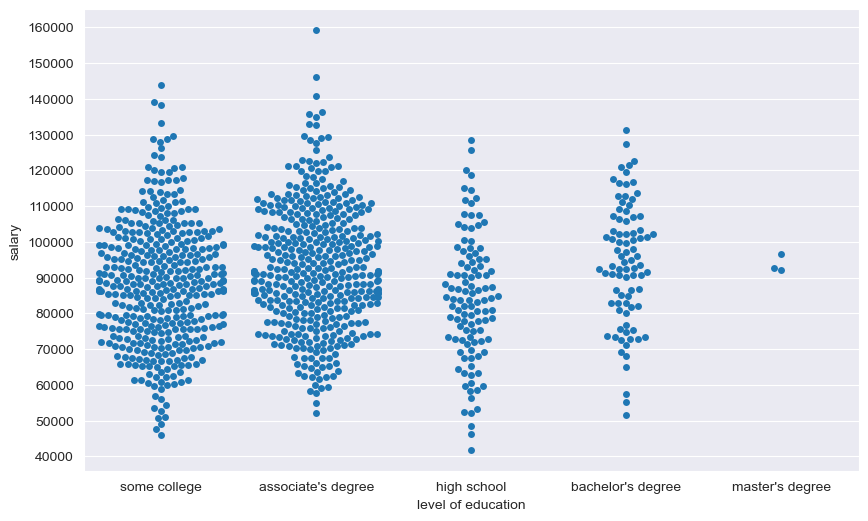

In [10]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x='level of education',  y='salary', orient='v')
plt.yticks(np.arange(40000,170000,10000))
plt.show()

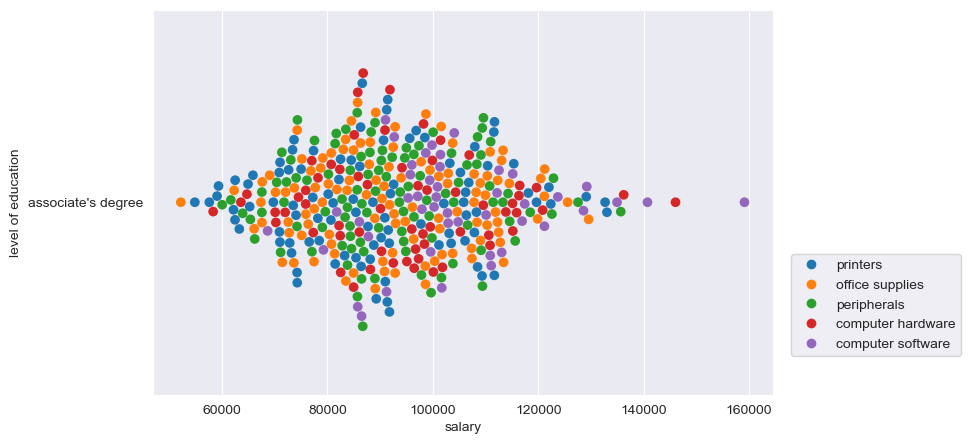

In [11]:
plt.figure(figsize=(8,5))
sns.swarmplot(data=df[df['level of education']=="associate's degree"], x='salary', y='level of education', 
              hue='division',orient='h', size=7)
plt.legend(loc=(1.03,0.1))
plt.show()

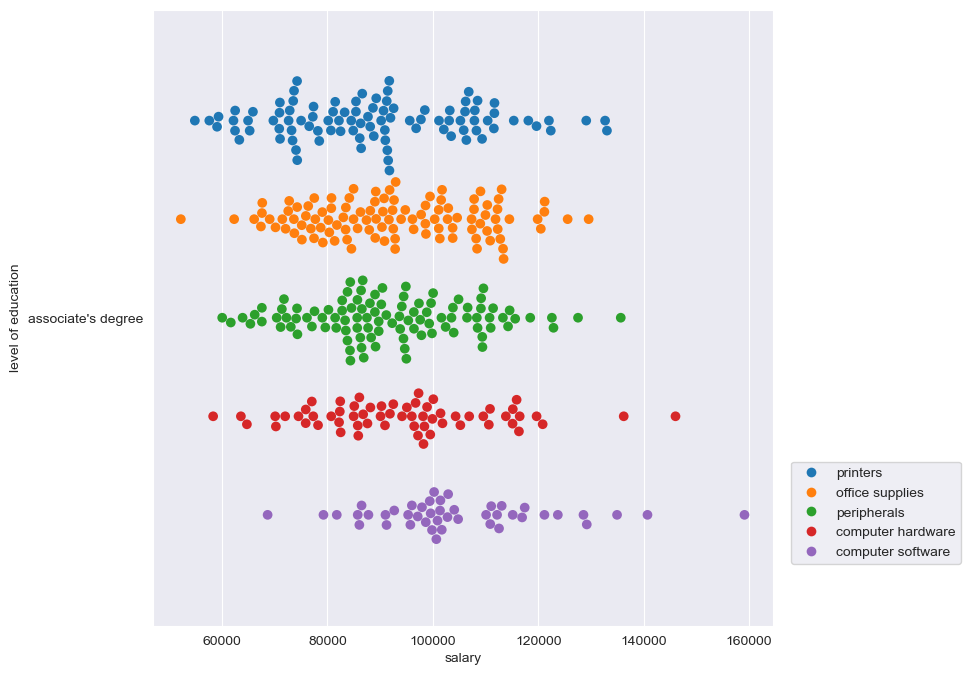

In [12]:
# as it is hard to interpret the above plot, we can use the parameter dodge to split up based on hue

plt.figure(figsize=(8,8))
sns.swarmplot(data=df[df['level of education']=="associate's degree"], x='salary', y='level of education', 
              hue='division',orient='h', size=7,dodge=True)
plt.legend(loc=(1.03,0.1))
plt.show()

In [13]:
df = pd.read_csv('/Users/sumanth/Documents/ML_PyNotes/Resource_Notebooks/05-Seaborn/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Joint plot : Plots scatter/hex/2d KDE along with histogram of the features 
        kind : used to set the main plot type
                hex represents the density of points in that particular hexagonal area
                

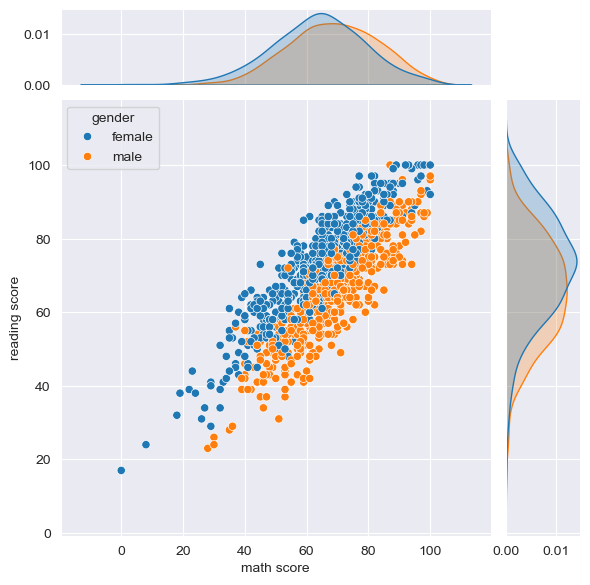

In [14]:
sns.jointplot(df, x='math score', y='reading score',  hue='gender', marginal_ticks=True)

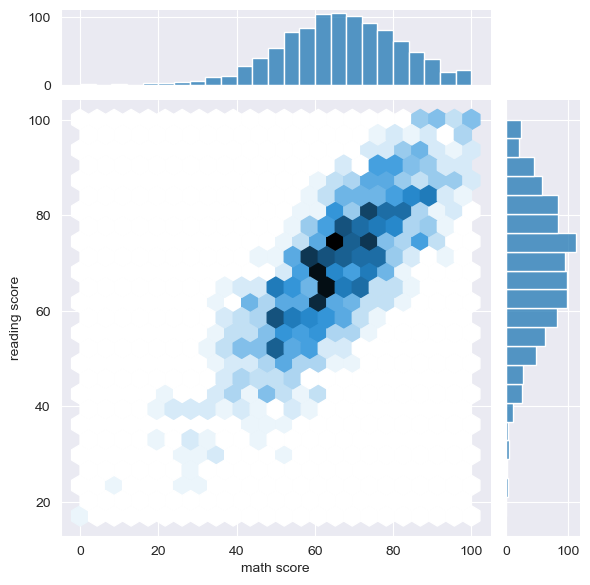

In [15]:
sns.jointplot(df, x='math score', y='reading score',kind='hex',marginal_ticks=True)

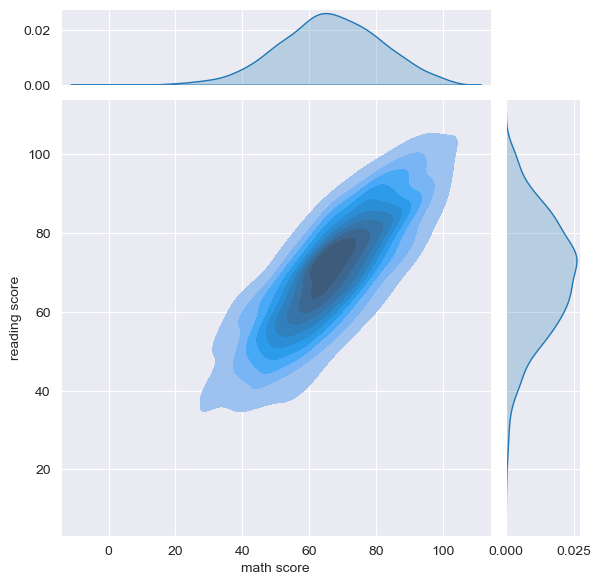

In [16]:
sns.jointplot(df, x='math score', y='reading score',
              kind='kde',fill=True,marginal_ticks=True)

Pair plot : Used to derive histogram & scatter plot for all combination of numeric features
            It is CPU & RAM intensive, so filter out the data before applying to each and every column
            Helpful in comparing features during feature engineering
            use corner = True for getting rid of duplicate plots on other side of diagonal

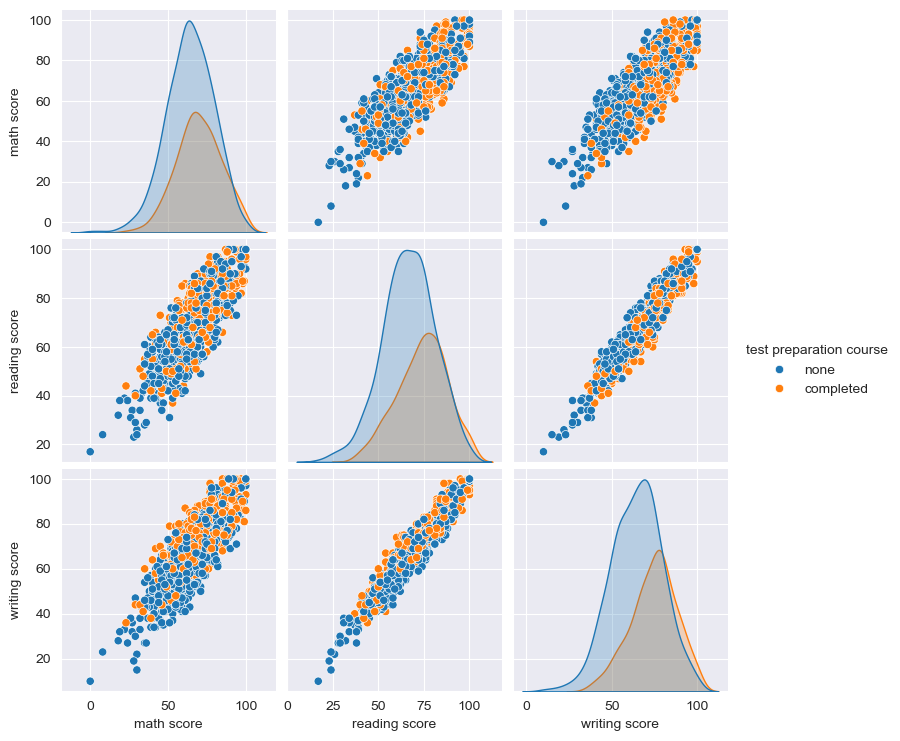

In [17]:
sns.pairplot(data=df,hue='test preparation course')

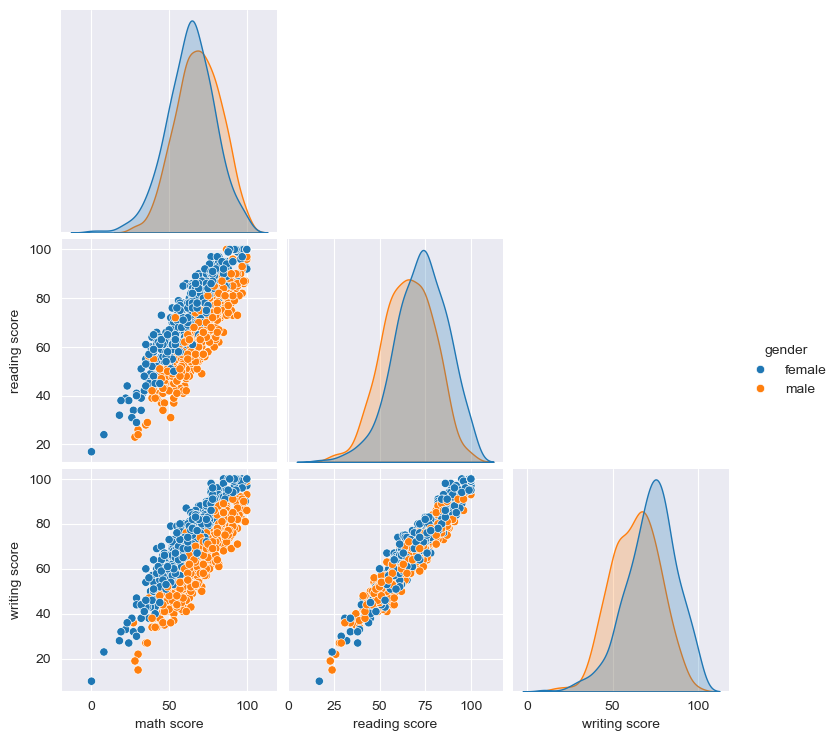

In [18]:
sns.pairplot(data=df,hue='gender',corner=True)

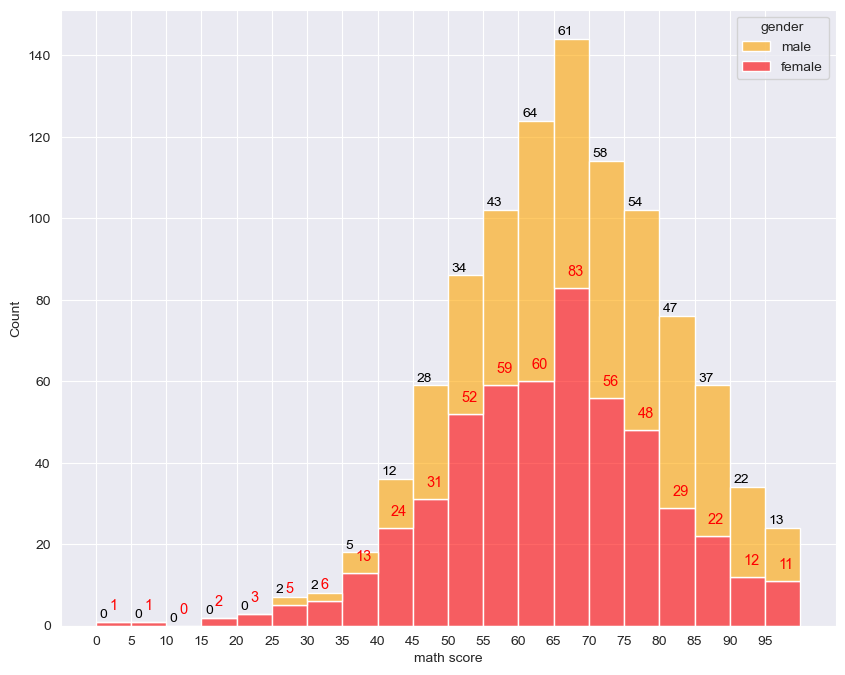

In [19]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=df,x='math score',
                  hue='gender', hue_order=['male','female'],
                  palette=['orange','red'],alpha=0.6,bins=20,multiple='stack')
for label in ax.containers[0]:
    ax.text(label.get_x()+1.9,label.get_height()+3,int(label.get_height()),color='red',fontsize=10.5)
    
for label,add in zip(ax.containers[1],ax.containers[0]):
    ax.text(label.get_x()+0.5,add.get_height()+label.get_height()+1,int(label.get_height()),color='black')

plt.xticks(np.arange(0,100,5))
plt.show()

Catplot : To have subplots for different categories
            the extra parameter row and col will split the plot based on category

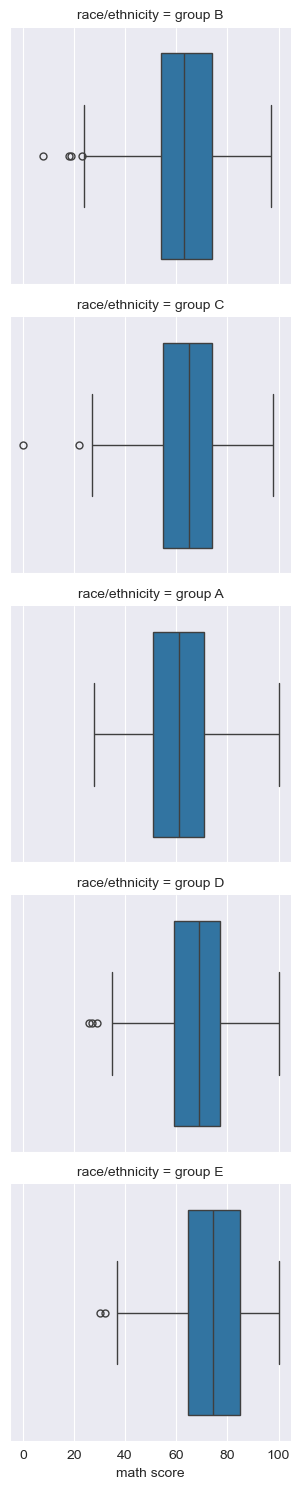

In [20]:
sns.catplot(data=df,x='math score',row='race/ethnicity',height=3,kind='box')

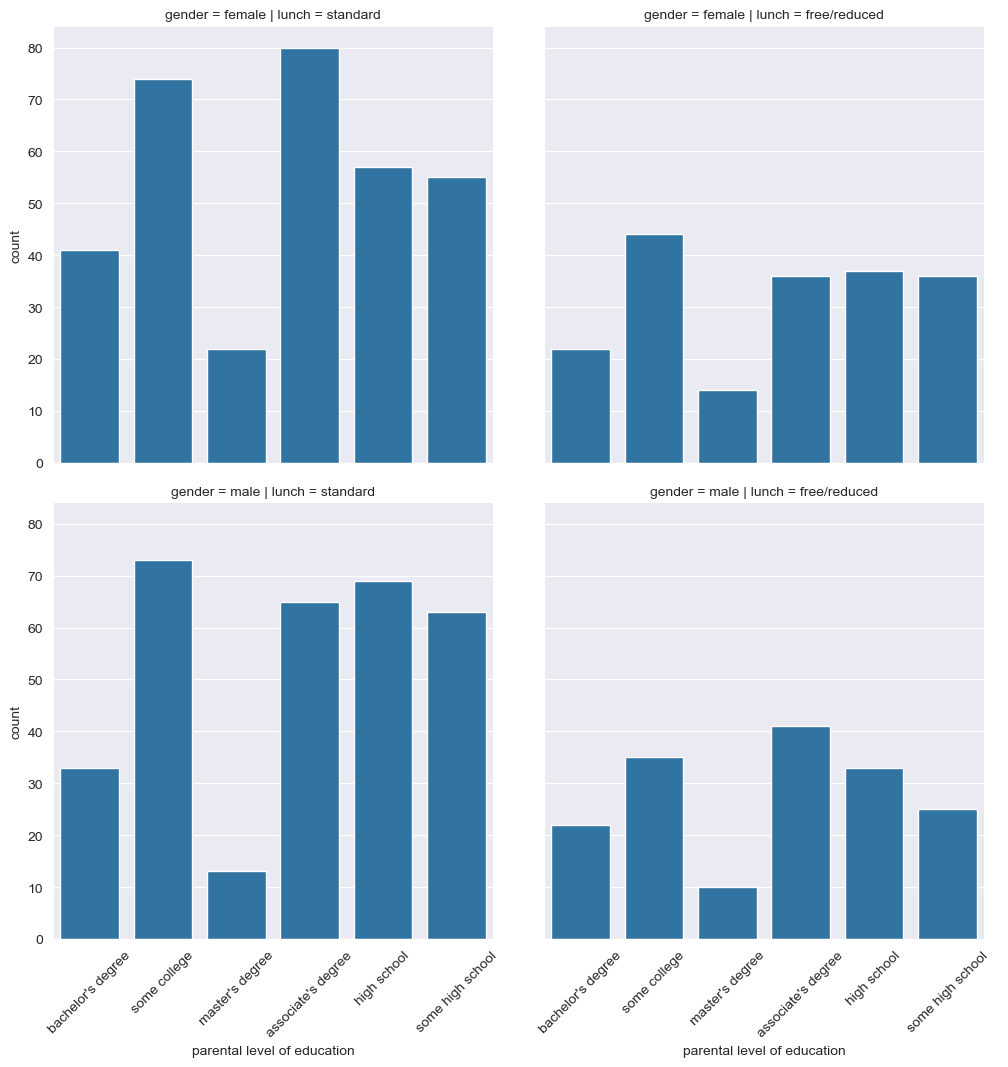

In [21]:
ax = sns.catplot(data=df,x='parental level of education',col='lunch',row='gender',kind='count')
ax.set_xticklabels(labels=df['parental level of education'].unique(),rotation=45)
plt.show()

PairGrid : customized version of pairgrid, we can set upper and lower part of diagonal

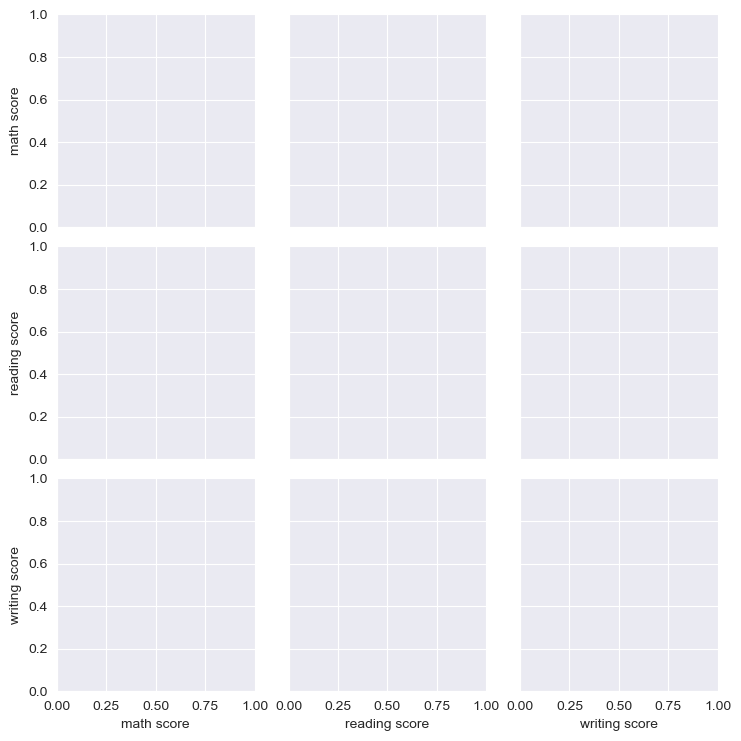

In [22]:
g = sns.PairGrid(df)

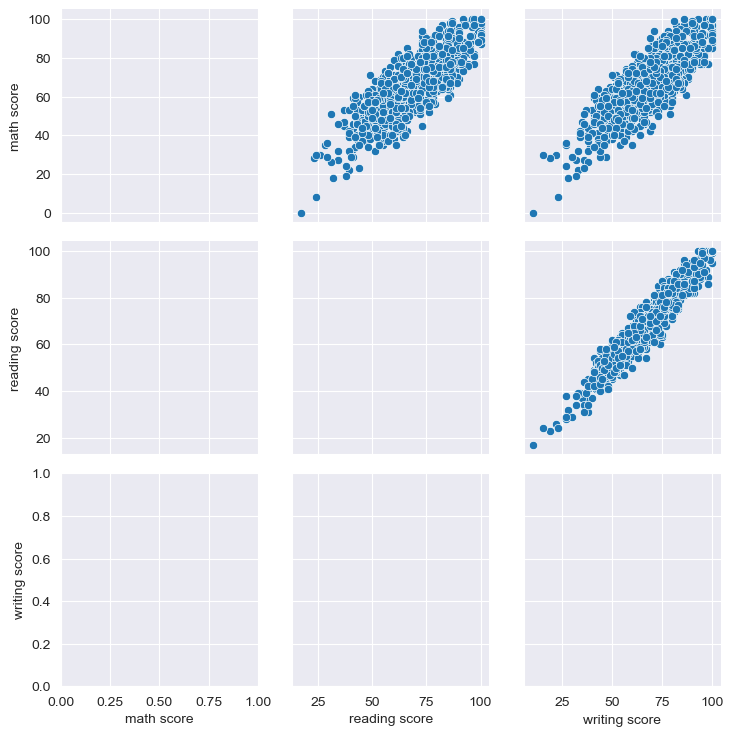

In [23]:
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot)
plt.show()

In [24]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

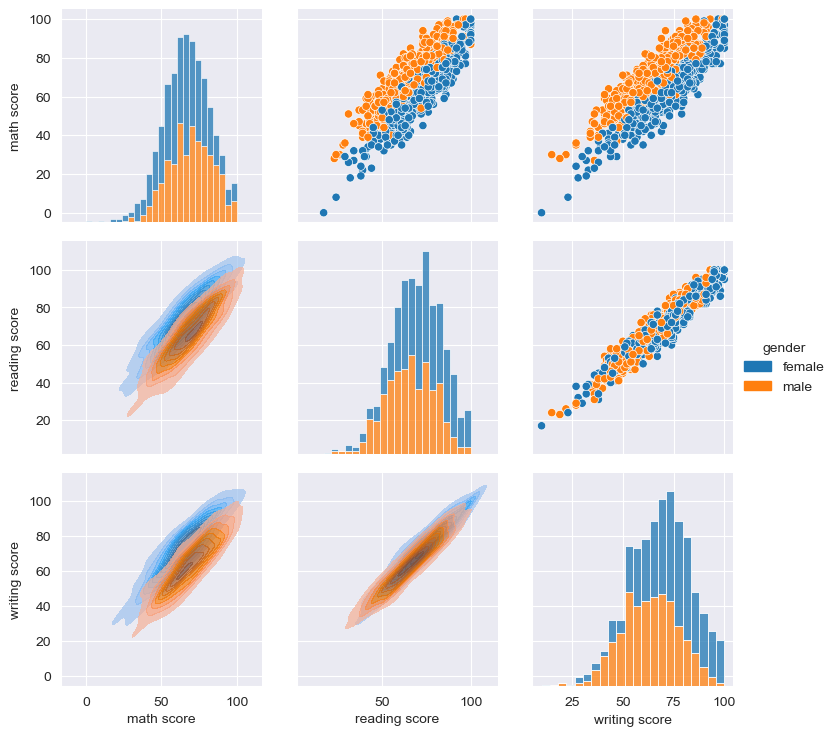

In [25]:
g = sns.PairGrid(df,hue='gender')
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot,fill=True,alpha=0.7)
g = g.map_diag(sns.histplot,multiple='stack')
g = g.add_legend()

Matrix Plots : Visualization equivalent of Pivot table. There are 2 type of plots
    
    Heatmap : They represent values with similar units along wit color shading.
        
    Clustermap : They reorganise the heatmap to get similar values together
                    row/col_cluster : True/False will make sure that row/columns arent clustered

pip install seaborn --upgrade

<Axes: ylabel='gender'>

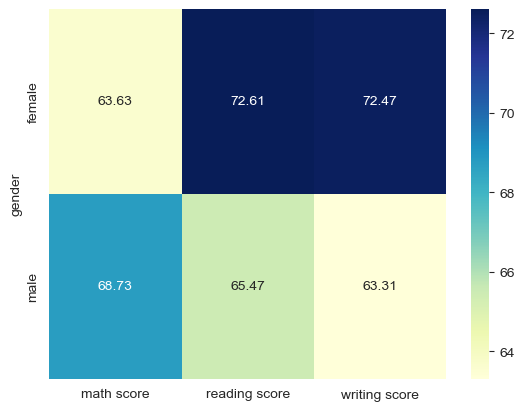

In [26]:
sns.heatmap(df[['gender','math score','reading score','writing score']].groupby('gender').mean(),
                  annot=True, fmt='.2f', cmap='YlGnBu')
                   

In [28]:
df = pd.read_csv('/Users/sumanth/Documents/ML_PyNotes/Resource_Notebooks/05-Seaborn/country_table.csv')
df.head()

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11


In [29]:
df.set_index('Countries',inplace=True)
df

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


<Axes: ylabel='Countries'>

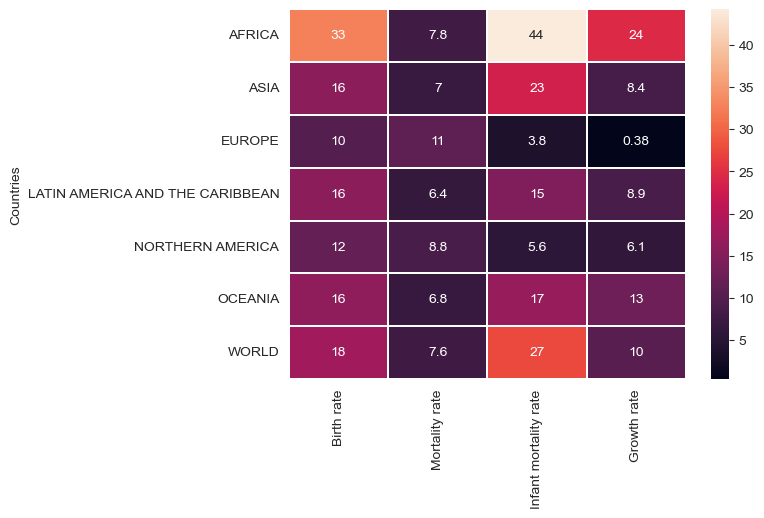

In [35]:
# we are dropping the life expectancy column as it doesnt have the same unit (rate) as compared to other columns
sns.heatmap(df.drop('Life expectancy',axis=1),annot=True,linewidths=0.3)

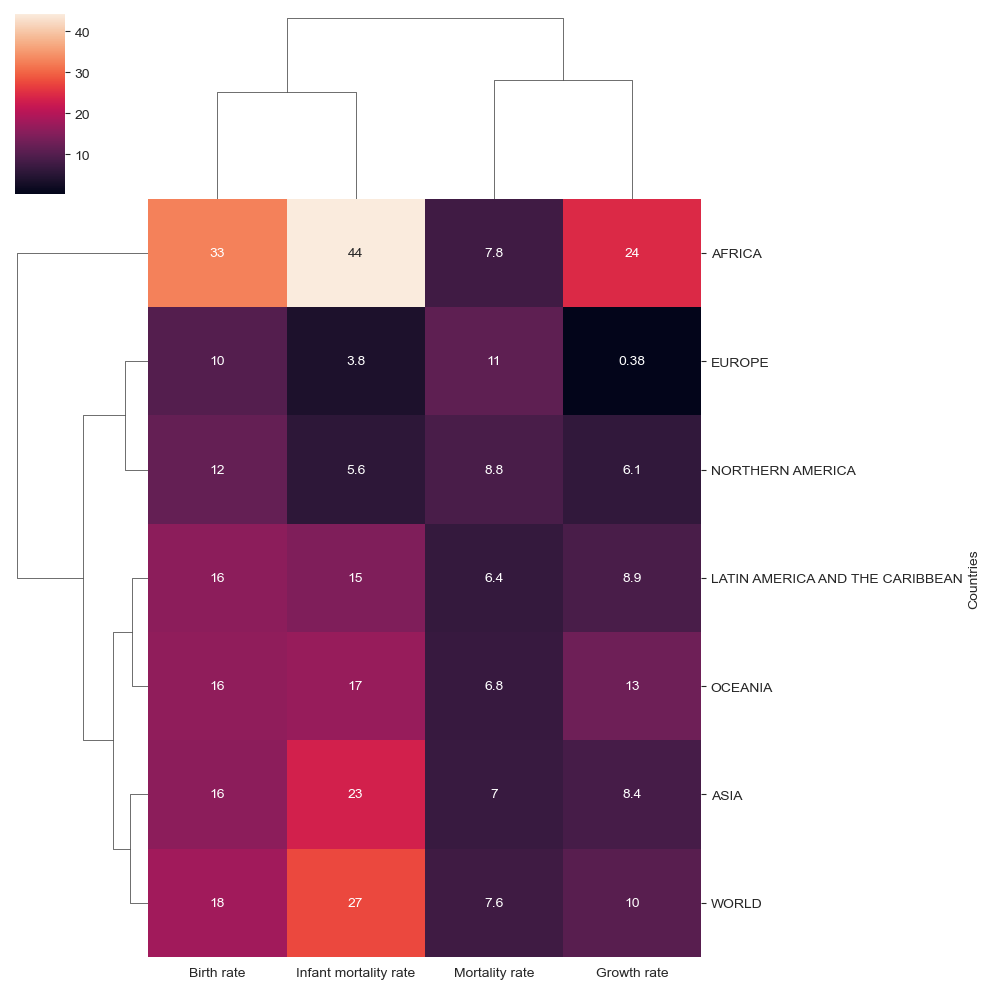

In [38]:
sns.clustermap(df.drop('Life expectancy',axis=1),annot=True)

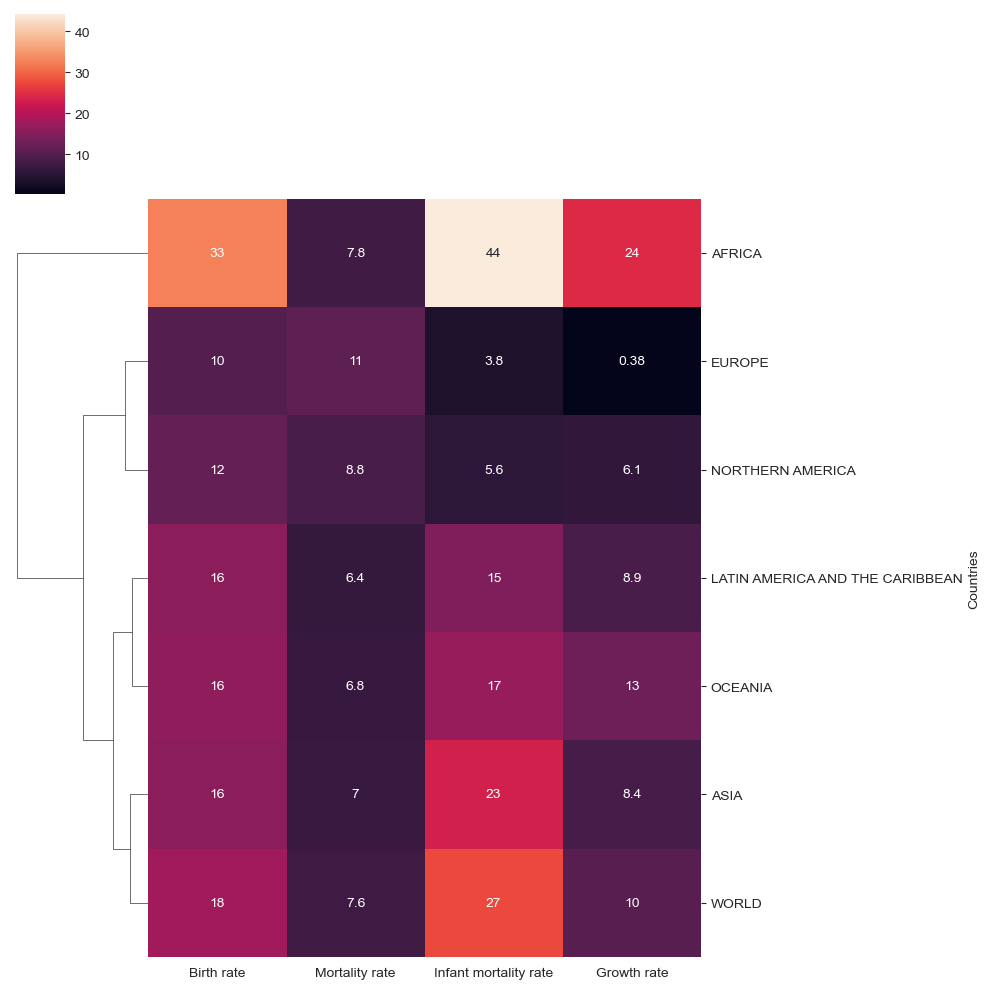

In [39]:
sns.clustermap(df.drop('Life expectancy',axis=1),annot=True,col_cluster=False)